# PANDAS

1. Импортируем нампи и пандас df - здесь будет название датафрейма
2. pd.set_option("display.precision", 2) - настраиваем дисплей? Да - точность дисплея, много др в set_option
#### Основные действия
3. df = pd.read_csv() Загружаем датафрейм из файла .csv  
df = pd.read_excel("файл", Sheet_name = "лист", ...) Из файла .xls
4. pd.to_excel() - запись в эксель  
pd.to_csv() - в цсв
5. df.head() - чтение первых 5 (при пустых скобках) с головы. В скобках - любое, нужное кол-во строчек.
6. df.shape - кол-во строк и столбцов без скобок
7. df.columns - названия всех столбцов без скобок
8. df.info() - информация по всей тбл
9. df["churn"] = df["churn"].astype("int64") - меняем тип данных в столбце churn
10. df.describe() - основные стат данные по столбцам (кол-во непропущенных значений, среднее,  
станд.откл, диапазон(мин/макс), медиана(50%), квартили(25 и 75))  
df.describe(include = ["object", "bool"]) - по нечисловым столбцам
11. df["churn"].value_counts() - для object & bool можно посмотреть распределение (даст 0-столько, 1-столько)  
если в скобках 0, то это normalize = False  
df["churn"].value_counts(normalize = True) - переход к процентам, точнее, здесь отношения значений к общему кол-ву
#### Сортировка
12. df.sort_values(by = "total day charge", ascending = False) - сортировка по знач в одном столбце, по убыванию  df.sort_values(by = ["churn", "total day charge"], ascending = [True, False]) - сорт по нескольким столбцам
#### Индексирование и получение данных
13. df["churn"].mean() - отношение (процент) по значению в одном столбце (по одному индексу)
14. df[df["churn"] == 1].mean() - булево индексирование. Просматриваем средние значения, по строкам, где выполняется условие.  Здесь - все средние значения для тех кто ушел к другому оператору.  
df[P(df["name"])].mean(), где Р - условие, name - имя столбца.  
df[df["churn"] == 1]["total day minutes"].mean() - среднее по одной, указанной строке, где выполн условие.  
Здесь - среднее время на телефоне днем тех, кто ушел к другому оператору.  
df[(df["churn"] == 0) & (df["international plan"] == "no")]["total intl minutes"].max() - берем 2 условия - тех кто остался  
и у которых нет международного плана и смотрим максимальное время которое кто-то болтает по межгороду (mean - среднее)  Соответственно min, max, mean - миним, макс, среднее!
15. df.loc[0 : 5, "state" : "area code"] - Срез по названию стлб и стр. ВКЛЮЧИТЕЛЬНО!  
df.iloc[0 : 5, 0 : 3] - Срез по номеру, по правилам Питона, ИСКЛЮЧАЯ ПРАВ КРАЙ!
16. df[-1:] - срезы строк (последняя); df[:1] - первая, df[3:4] - третья и т.д.
#### Применение функций к ячейкам
17. df.apply(np.max) - выведет макс значения во всех столбцах  
df[df["state"].apply(lambda state: state[0] == "W")].head() - выведет только те строки, где штат начинается с W (5строк)
18. map - метод для замены значений  
s = {"yes": True, "no": False}  
df["international plan"] = df["international plan"].map(s) - заменит значения Да и Нет в колонке МГ_план на Правду и Ложь 
19. replace - метод для замены значений (делает тоже самое, что и map)  
s = тоже что и выше  
df = df.replace({"voice mail plan": s}) - результат такой же, но вроде так быстрее и короче.
#### Группировка
20. df.groupby(["churn"])["total day minutes", "total eve minutes"].dicribe(percentiles = []) - группирует по значению  
в столбце "churn". Остальное вспомогательно. Список можно и отдельный помещать, как внизу, можно каждый столбец прописать,  
дальше любая функция, здесь describe. В скобках у нее тоже не обязат условие.  Синтаксис такой:  
df.groupby(by = колонки по которым группируем)[колонки которые показываем].функция()
21. df.groupby(["churn"])["columns_to_show"].agg([np.mean, np.std]) - Несколько ф-й выборочно в agg.
#### Сводные таблицы
22. pd.crosstab(df["churn"], df["intern plan"]) - наблюдение по 2 параметрам. Здесь сколько имеющих МГ план осталось/ушло  
pd.crosstab(df["churn"], df["vm_plan"], normalize = True) - отношение(%).
23. df.pivot_table([value1, value2...], [index], aggfunc = "функция"):  
values - список переменных для расчета статистики,  
index - список переменных для группировки данных,  
aggfunc - что надо с ними сделать (среднее, мин, макс и т.д.)  
df.pivot_table(["total day calls", "total eve calls"], ["area code"], aggfunc = 'mean') - сводная таблица  
смотрим среднее кол-во звонков днем и накануне по разным городам
#### Преобразование DataFrame
24. 1 Вариант вставки столбцов в таблицу через insert:  
total_calls = (df['total day calls'] + df['total eve calls'] +...) - создаем список значений  
df.insert(loc = len(df.columns), column = 'total calls', values = total_calls)  
loc - указываем номер столбца после которого вставляем новый, здесь вставляем в конец (поэтому len(столбцов))  
column - название нового столбца  
values - список значений
25. 2 Вариант вставки столбца в конец DataFrame, напрямую сразу вставляем (внимательно к скобке):  
df['total charge'] = (df['total day charge'] + df['total eve charge'] ...)
26. df.drop(["total cals", "total charge"], axis = 1, inplace = True) - удалим 2, axis = 1 - столбца, = 0 - строки  
inplace = True - изменяем существующий DataFrame, = Flse - не изменяя.  
#### Попытка прогнозирования оттока клиентов
27. import matplotlib.piplot as mpt  
import seaborn as sns - импортируем матплотлиб и сеаборн  
%config InlineBackend.figur_format = "retina" - настраиваем экран на отображение в стиле ретина
28. pd.crosstab(df["churn"], df["int plan"], margins = True) - сводная тбл зависимость оттока от МГ плана  
sns.countplot(x = "int plan", hue = "churn", data = df) - рисуем гистограмму1  
pd.crosstab(df["churn"], df["customer serv calls"], margins = True) - сводн тбл зависимость оттока от кол-ва  
звонков в сервисную службу
sns.countplot(x = "customer serv calls", hue = "churn", data = df) - гистограмма2
29. df["many calls"] = (df["cust serv calls"] > 3).astype("int") - добавляем столбец с кол-вом звонков более 3  
pd.crosstab(df["churn"], df["many calls"], margins = True) - смотрим сводную таблицу  
sns.countplot(x = "many calls", hue = "churn", data = df) - гистограмма. (повторяет сводн тбл, оси х и у соотв значениям)
    

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option("display.precision", 2)

In [ ]:
pd.set_option('display.max_rows', 100) #Здесь - максимальное кол-во строк при выводе на дисплей - 100

## Основные действия

In [3]:
df  =  pd.read_csv("telecom_churn.csv") #читает из цсв, который в корневом ноутбуке, или указываем путь, все в кавычках!

In [4]:
df.head() #выводит 5 первых строк, или столько, сколько пропишем в скобках

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
print(df.shape) #Смотрим размерность

(3333, 21)


In [6]:
print(df.columns) #Названия столбцов (атрибутов или характеристик)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [7]:
df.info() #Вообще информация про наш файл, какие типы в столбцах, как заполнены

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
df["churn"] = df["churn"].astype("int64") #Меняем тип данных в столбце churn с bool на цифру

In [9]:
df.describe() #Описывает основные статистические характеристики по каждому признауку(столбцу).
#Счет всего, среднее, стандартное отклонение, мин, макс, середину и квартили (25 и 75)
#ПО ЧИСЛОВЫМ СТОЛБЦАМ!!!

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


In [10]:
df.describe(include = ["object", "bool"]) #ПО НЕЧИСЛОВЫМ СТОЛБЦАМ указываем их тип данных

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,348-1359,no,no
freq,106,1,3010,2411


In [11]:
df["churn"].value_counts() #Смотрим распределение (сколько таких или таких или таких... значений)
#Здесь видим сколько клиентов осталось (это 0 в churn) и сколько ушло (это 1 в churn)
#Ничего в скобках - это normalize = False!

0    2850
1     483
Name: churn, dtype: int64

In [12]:
df["churn"].value_counts(normalize = True) #Если в скобках True, то видим отношения(проценты)

0    0.86
1    0.14
Name: churn, dtype: float64

## Сортировка

In [13]:
df.sort_values(by = "total day charge", ascending = False).head() #Сортировка всей тбл по значениям в одном столбце по убыванию

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
365,CO,154,415,343-5709,no,no,0,350.8,75,59.64,...,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,348-1163,yes,no,0,345.3,81,58.70,...,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,...,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,373-2053,no,no,0,335.5,77,57.04,...,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


In [14]:
df.sort_values(by = ["churn", "total day charge"], ascending = [True, False]).head() #Сортировка по нескольким столбцам

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
688,MN,13,510,338-7120,no,yes,21,315.6,105,53.65,...,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,363-7802,no,yes,31,313.8,87,53.35,...,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,373-6784,no,no,0,310.4,97,52.77,...,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,351-7369,no,yes,36,309.9,90,52.68,...,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,388-8583,no,yes,28,308.0,123,52.36,...,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


## Индексирование и получение данных

In [15]:
df["churn"].mean() #Смотрим отношение по 1 столбцу (индексу) - здесь процент оттока 

0.14491449144914492

In [16]:
round(df["churn"].mean() * 100, 1) #Немного украсим от себя, чтоб на норм проценты было похоже)))

14.5

In [17]:
df[df["churn"] == 1].mean() #Просмотр данных по булеву условию. Смотрим средние значения для всех кто ушел.
#df[P(df["name"])].mean(), где Р-логическое условие, кот повторяется для каждого эл-та столбца. Рез-т - DF, состоящий
#из строк, где выполняется условие Р в "name" столбце.

account length            102.66
area code                 437.82
number vmail messages       5.12
total day minutes         206.91
total day calls           101.34
total day charge           35.18
total eve minutes         212.41
total eve calls           100.56
total eve charge           18.05
total night minutes       205.23
total night calls         100.40
total night charge          9.24
total intl minutes         10.70
total intl calls            4.16
total intl charge           2.89
customer service calls      2.23
churn                       1.00
dtype: float64

In [18]:
df[df["churn"] == 1]["total day minutes"].mean() #В одной строке для тех кто ушел.

206.91407867494814

In [19]:
df[(df["churn"] == 0) & (df["international plan"] == "no")]["total intl minutes"].max()
#Здесь два условия вместе (те, кто остался и у кот нет МГ плана)
#max, min, mean - большее, меньшее, среднее(арифметическое)

18.9

In [20]:
df.loc[0 : 5, "state" : "area code"] #Индексирование (срез) по названию строки и столбца, ВКЛЮЧИТЕЛЬНО!

,state,account length,area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [21]:
df.iloc[0 : 5, 0 : 3] #Срез по номеру строки, столбца, КАК В ПИТОНЕ, НЕ ВКЛЮЧАЕТ ПРАВ КРАЙ!

,state,account length,area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


In [22]:
df[-1:] #Различные срезы по правилам срезов в Питоне доступны для строк (это будет последняя)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


In [23]:
df[:1] #а это первая

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


In [24]:
df[3:4] #Ну, третья)))

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0


## Применение функций к ячейкам

In [25]:
df.apply(np.max) #Максимальное значение по каждому столбцу

state                           WY
account length                 243
area code                      510
phone number              422-9964
international plan             yes
voice mail plan                yes
number vmail messages           51
total day minutes            350.8
total day calls                165
total day charge             59.64
total eve minutes            363.7
total eve calls                170
total eve charge             30.91
total night minutes          395.0
total night calls              175
total night charge           17.77
total intl minutes            20.0
total intl calls                20
total intl charge              5.4
customer service calls           9
churn                            1
dtype: object

In [26]:
df[df["state"].apply(lambda state: state[0] == "W")].head() #выбираем строки, 
#где штат на букву W, через лямбду к каждой строке

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,357-3817,no,yes,39,213.0,115,36.21,...,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,352-1237,no,no,0,154.0,67,26.18,...,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,405-7146,no,yes,24,133.2,135,22.64,...,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,353-3759,no,no,0,151.0,83,25.67,...,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


In [27]:
slovar = {"yes": True, "no": False} #Используем словарь для замены ДА и НЕТ на Правду и Ложь соответственно
df["international plan"] = df["international plan"].map(slovar)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,False,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,False,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,False,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,True,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,True,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [28]:
df = df.replace({"voice mail plan" : slovar}) #slovar тот же, замена через replace даже быстрее, чем прошлый вариант.
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Группировка

In [29]:
columns_to_show = ["total day minutes", "total eve minutes", "total night minutes"] 
#Просто создаем список для следующего отбора по нему. Но можно просто указать колонки также или одну колонку.

In [30]:
df.groupby(["churn"])[columns_to_show].describe(percentiles = []) 
#Группирует по колонке оттока те столбцы, которые указали в списке. 
#Если не указывать, то выдаст по всем. В describe можно и не указывать тоже ничего. 
#Можно и другой метод (mean, н-р)   

total day minutes                                   total eve minutes  \
                  count    mean    std  min    50%    max             count   
churn                                                                         
0                2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
1                 483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
churn                                                                         
0      199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
1      212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
churn                       
0      23.2  200.25  395.0  
1      47.4  204.80  354.9

In [31]:
df.groupby(["churn"])[columns_to_show].agg([np.mean, np.std, np.min, np.max]) #Можно несколько ф-й выборочно!

total day minutes                    total eve minutes               \
                   mean    std amin   amax              mean    std  amin   
churn                                                                       
0                175.18  50.18  0.0  315.6            199.04  50.29   0.0   
1                206.91  69.00  0.0  350.8            212.41  51.73  70.9   

             total night minutes                      
        amax                mean    std  amin   amax  
churn                                                 
0      361.8              200.13  51.11  23.2  395.0  
1      363.7              205.23  47.13  47.4  354.9

## Сводные таблицы

In [32]:
pd.crosstab(df["churn"], df["international plan"]) #Наблюдение по 2 перем.
#Здесь смотрим сколько из имеющих МГ план осталось/ушло

international plan,False,True
churn,,
0,2664,186
1,346,137


In [33]:
pd.crosstab(df["churn"], df["voice mail plan"], normalize = True) #А здесь имеющих голос почту, в процентах

voice mail plan,False,True
churn,,
0,0.60,0.25
1,0.12,0.02


In [34]:
pd.crosstab(df["churn"], df["voice mail plan"], normalize = True) * 100 #Тоже, поукрашаем

voice mail plan,False,True
churn,,
0,60.25,25.26
1,12.09,2.40


In [35]:
df.pivot_table(["total day calls", "total eve calls", "total night calls"], ['area code'], aggfunc = 'mean') 
#Сводная таблица
#Смотрим среднее кол-во звонков днем, накануне, ночью по разным городам

,total day calls,total eve calls,total night calls
area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


## Преобразование датафреймов

In [36]:
total_calls = (df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls'])
#1Вариант добавления столбцов - сначала создадим список значений

In [37]:
df.insert(loc = len(df.columns), column = 'total calls', value = total_calls) #Добавим столбец через инсерт.
#loc - после какого столбца(индекс) будет вставлен новый. Здесь вставляем в конец, индекс = кол-ву столбцов
#далее название нового столбца и список значений ранее созданный (здесь прописать не получится выражение)

In [38]:
df.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total calls
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333


In [39]:
df['total charge'] = (df['total day charge'] + df['total eve charge'] +
                      df['total night charge'] + df['total intl charge']) #2Вариант добавить в конец новый столбец!

In [40]:
df.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total calls,total charge
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29


In [41]:
df.drop(['total calls', 'total charge'], axis = 1, inplace = True) #Удаляем. axis = 1 -столбцы, = 0 - строки
#inplace = True - изменяя существующий DataFrame; = False - без изменений.

In [42]:
df.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


## Попытка прогнозирования оттока клиентов

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
#Импортируем библиотеки

In [44]:
%config InlineBackend.figure_format = 'retina' #Настраиваем экран, в ретине будет лучше видно

<AxesSubplot:xlabel='international plan', ylabel='count'>

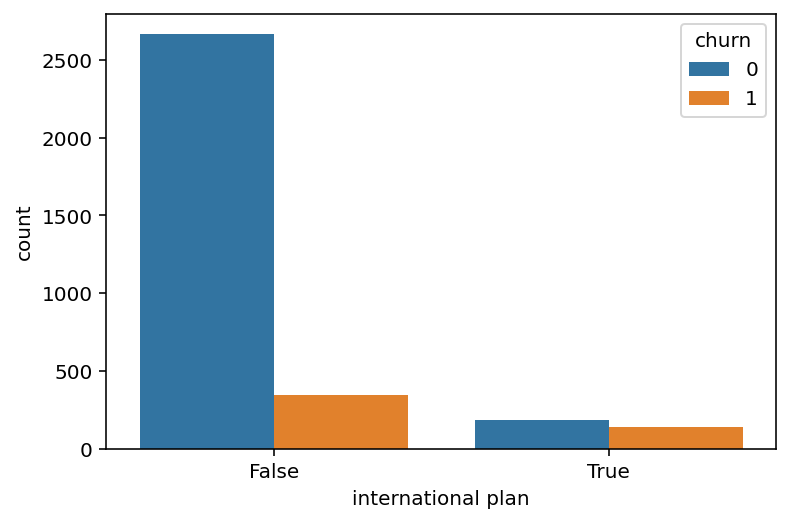

In [45]:
sns.countplot(x = 'international plan', hue = 'churn', data = df) #Строим гистограмму по которой сразу видно, что
#Среди ушедших пользовались МГ планом большое кол-во человек

In [46]:
pd.crosstab(df["churn"], df["customer service calls"], margins = True) #Смотрим тбл, зависимость оттока от количества
#звонков в сервисную службу

customer service calls,0,1,2,3,4,5,6,7,8,9,All
churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


<AxesSubplot:xlabel='customer service calls', ylabel='count'>

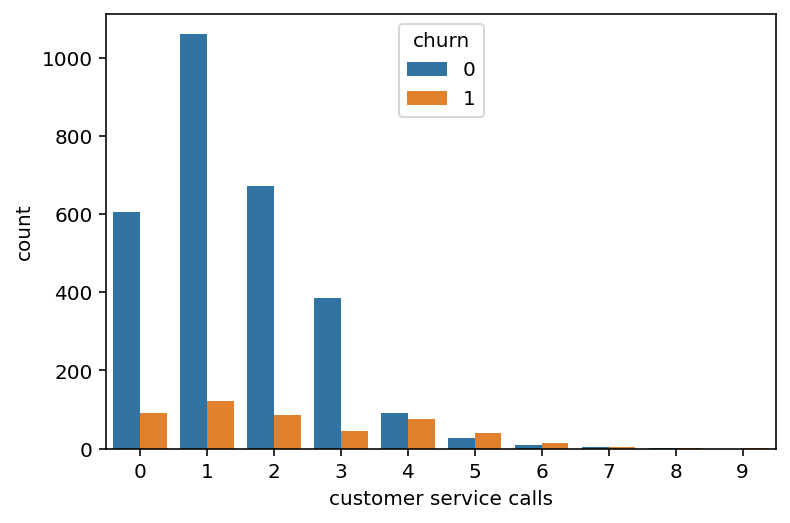

In [47]:
sns.countplot(x = "customer service calls", hue = "churn", data = df) #Рисуем гистограмму этой зависимости, 
#видим, что при более чем 3 звонков большой отток, упростим восприятие, сделаем меньше 3 и больше 3

In [48]:
df["many serv calls"] = (df["customer service calls"] > 3).astype("int") #Добавляем стлб звонков в сервис больше 3

In [49]:
pd.crosstab(df["churn"], df["many serv calls"], margins = True) #Смотрим сводную табличку

many serv calls,0,1,All
churn,,,
0,2721,129,2850
1,345,138,483
All,3066,267,3333


<AxesSubplot:xlabel='many serv calls', ylabel='count'>

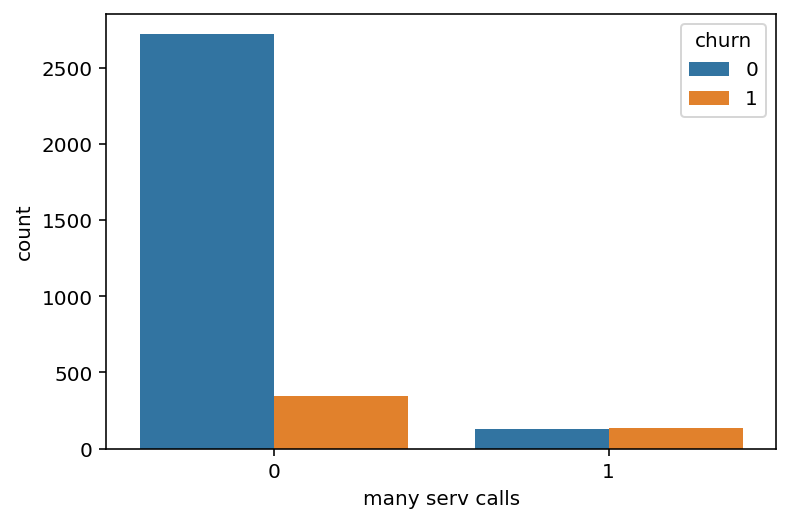

In [51]:
sns.countplot(x = "many serv calls", hue = "churn", data = df) #Рисуем гистограмму. Четко видно, где звонков >3 - 
#большой отток!

In [52]:
pd.crosstab(df["many serv calls"] & df["international plan"], df["churn"]) #Смотрим по двум параметрам совместно
#Получаем 85.8% верных рез-тов при прогнозе - базовую точку (минус 464 + 9 ошибок от 3333)

churn,0,1
row_0,,
False,2841,464
True,9,19
